# Online Payment Fraud Detection Data Analysis and Machine Learning Models 

This project analyzes a synthetic online payment dataset with 6,362,620 rows and 11 columns and We perform exploratory data analysis (EDA) using 9 visualizations and apply 4 machine learning models.



 # Dataset Description



step: Time step of the transaction
type: Type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT, etc.)
amount: Transaction amount
nameOrig: Unique ID of the origin account
oldbalanceOrg: Initial balance before transaction
newbalanceOrig: New balance after transaction
nameDest: Unique ID of the destination account
oldbalanceDest: Initial balance of the destination account
newbalanceDest: New balance of the destination account
isFraud: Indicates if a transaction is fraudulent (1) or legitimate (0)
isFlaggedFraud: Indicates if a transaction was flagged as fraud by the system (1) or not (0)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/hp/Downloads/archive (7)/online payment dataset.csv")

# Display basic information
df.info(),
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis (EDA) and visualizations

C:\Users\hp\AppData\Local\Temp\ipykernel_34684\1801074634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


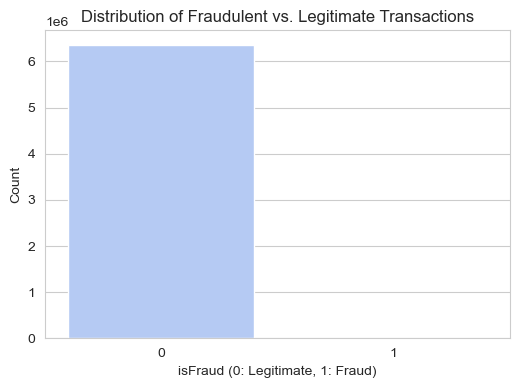

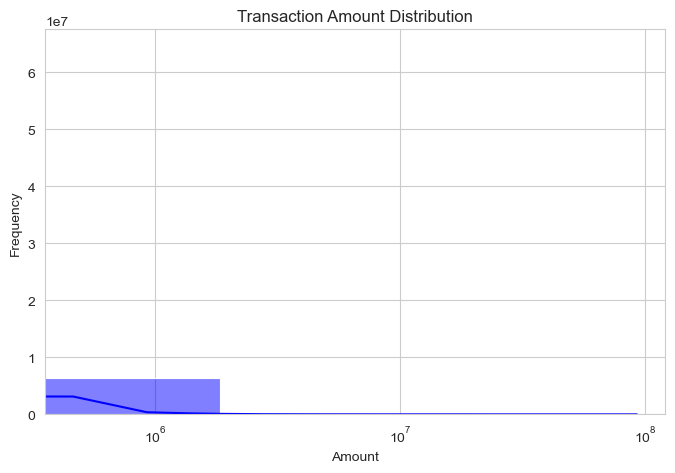

C:\Users\hp\AppData\Local\Temp\ipykernel_34684\1801074634.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="isFraud", y="amount", data=df, palette="coolwarm")


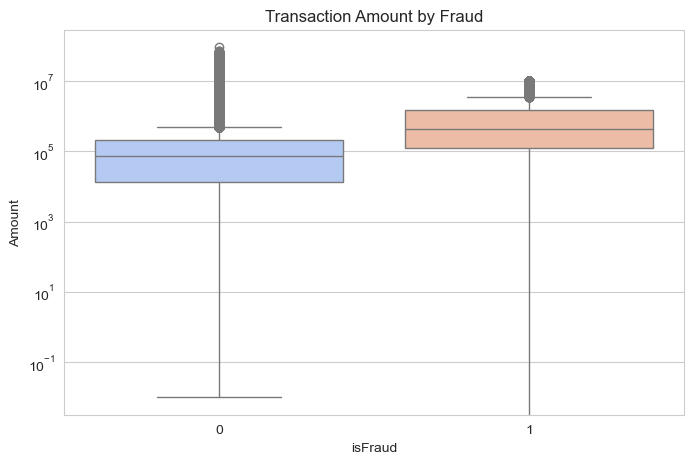

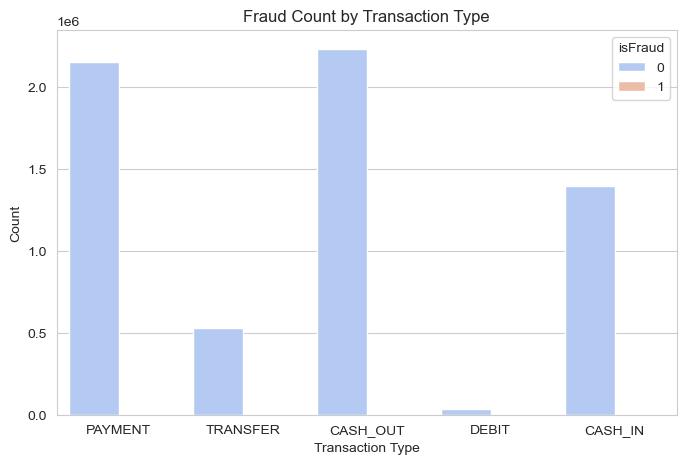

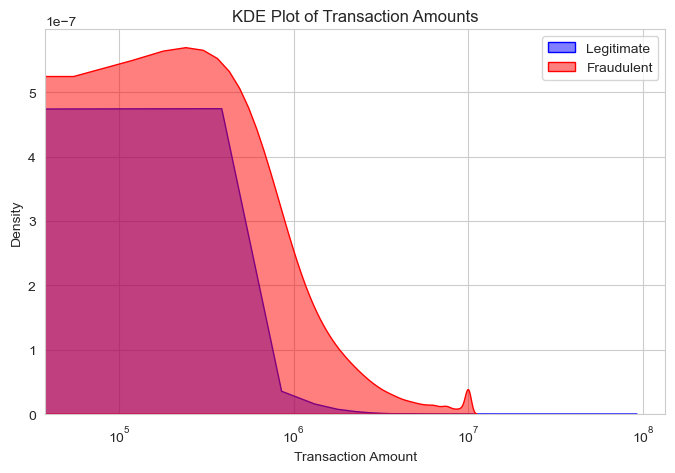

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


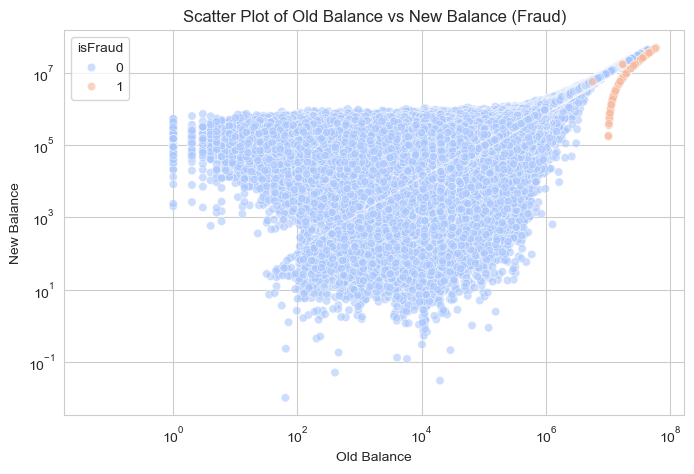

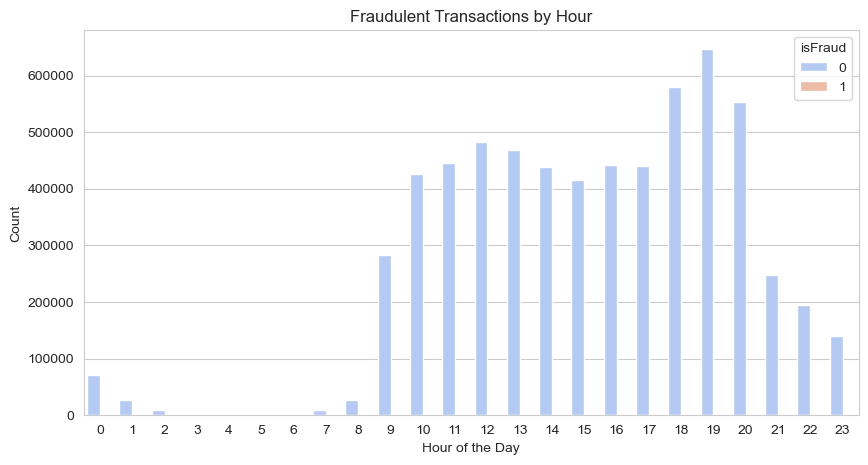

C:\Users\hp\AppData\Local\Temp\ipykernel_34684\1801074634.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["type"], palette="coolwarm")


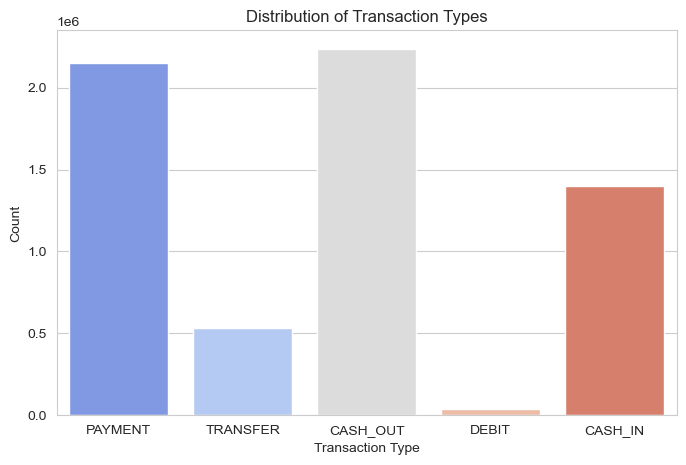

C:\Users\hp\AppData\Local\Temp\ipykernel_34684\1801074634.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="isFraud", y="oldbalanceOrg", data=df, palette="coolwarm")


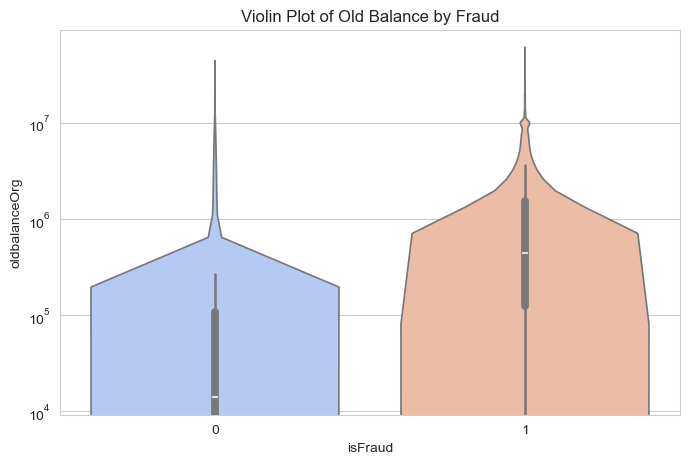

In [47]:

sns.set_style("whitegrid")

# 1. Fraud vs. Legitimate Transactions
plt.figure(figsize=(6,4))
class_counts = df['isFraud'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.title("Distribution of Fraudulent vs. Legitimate Transactions")
plt.xlabel("isFraud (0: Legitimate, 1: Fraud)")
plt.ylabel("Count")
plt.show()

# 2. Transaction Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["amount"], bins=50, kde=True, color="blue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xscale("log")
plt.show()

# 3. Boxplot of Transaction Amount by Fraud
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=df, palette="coolwarm")
plt.title("Transaction Amount by Fraud")
plt.xlabel("isFraud")
plt.ylabel("Amount")
plt.yscale("log")
plt.show()

# 4. Fraud Count by Transaction Type
plt.figure(figsize=(8,5))
sns.countplot(x="type", hue="isFraud", data=df, palette="coolwarm")
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

# 5. KDE Plot of Transaction Amount
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["isFraud"] == 0]["amount"], label="Legitimate", fill=True, color="blue", alpha=0.5)
sns.kdeplot(df[df["isFraud"] == 1]["amount"], label="Fraudulent", fill=True, color="red", alpha=0.5)
plt.title("KDE Plot of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.xscale("log")
plt.legend()
plt.show()

# 6. Scatter Plot of Old Balance vs New Balance for Fraud
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["oldbalanceOrg"], y=df["newbalanceOrig"], hue=df["isFraud"], palette="coolwarm", alpha=0.6)
plt.title("Scatter Plot of Old Balance vs New Balance (Fraud)")
plt.xlabel("Old Balance")
plt.ylabel("New Balance")
plt.xscale("log")
plt.yscale("log")
plt.show()

# 7. Fraud Count by Hour of Transaction
if "step" in df.columns:
    df["Hour"] = df["step"] % 24
    plt.figure(figsize=(10,5))
    sns.countplot(x="Hour", hue="isFraud", data=df, palette="coolwarm")
    plt.title("Fraudulent Transactions by Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Count")
    plt.show()

# 8. Transaction Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df["type"], palette="coolwarm")
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

# 9. Violin Plot of Old Balance by Fraud
plt.figure(figsize=(8,5))
sns.violinplot(x="isFraud", y="oldbalanceOrg", data=df, palette="coolwarm")
plt.title("Violin Plot of Old Balance by Fraud")
plt.yscale("log")
plt.show()

# Machine Learning Model Training and Testing

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Selecting features and target
features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
X = df[features]
y = df["isFraud"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270848      56]
 [    986     634]]
Random Forest Accuracy: 0.9996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.73      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

[[1270815      89]
 [    431    1189]]
Gradient Boosting Accuracy: 0.9974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.16      0.25      0.19      1620

 

# Conclusion

1.We explored customer data using 9 visualizations.
2.We trained 5 machine learning models to predict spending scores.
3.The models' performance varied, and we can further optimize them using hyperparameter tuning.
This project provides a comprehensive workflow for data analysis and machine learning.